<a href="https://colab.research.google.com/github/Abinandhana-sekar/waste-data-dashboard/blob/main/recycle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df= pd.read_csv('/content/2003_2017_waste.csv')

In [ ]:
print(df.head())

            waste_type  waste_disposed_of_tonne  total_waste_recycled_tonne  \
0                 Food                   679900                      111100   
1      Paper/Cardboard                   576000                      607100   
2             Plastics                   762700                       59500   
3                  C&D                     9700                     1585700   
4  Horticultural waste                   111500                      209000   

   total_waste_generated_tonne  recycling_rate  year region  
0                       791000            0.14  2016  India  
1                      1183100            0.51  2016  India  
2                       822200            0.07  2016  India  
3                      1595400            0.99  2016  India  
4                       320500            0.65  2016  India  


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   waste_type                   225 non-null    object 
 1   waste_disposed_of_tonne      225 non-null    int64  
 2   total_waste_recycled_tonne   225 non-null    int64  
 3   total_waste_generated_tonne  225 non-null    int64  
 4   recycling_rate               225 non-null    float64
 5   year                         225 non-null    int64  
 6   region                       225 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 12.4+ KB
None


In [ ]:
print(df.isnull().sum())

waste_type                     0
waste_disposed_of_tonne        0
total_waste_recycled_tonne     0
total_waste_generated_tonne    0
recycling_rate                 0
year                           0
region                         0
dtype: int64


In [ ]:
print(df.dtypes)

waste_type                      object
waste_disposed_of_tonne          int64
total_waste_recycled_tonne       int64
total_waste_generated_tonne      int64
recycling_rate                 float64
year                             int64
region                          object
dtype: object


In [ ]:
df.columns = [col.strip().lower().replace(' ', '_') for col in df.columns]


In [ ]:
df=df.dropna()

In [ ]:
print(df.describe(include='all'))

             waste_type  waste_disposed_of_tonne  total_waste_recycled_tonne  \
count               225             2.250000e+02                2.250000e+02   
unique               32                      NaN                         NaN   
top     Paper/Cardboard                      NaN                         NaN   
freq                 15                      NaN                         NaN   
mean                NaN             3.697191e+05                4.896987e+05   
std                 NaN             6.842470e+05                9.607678e+05   
min                 NaN             1.300000e+03                0.000000e+00   
25%                 NaN             2.460000e+04                1.830000e+04   
50%                 NaN             1.062000e+05                9.110000e+04   
75%                 NaN             5.000000e+05                5.200000e+05   
max                 NaN             3.045200e+06                4.825900e+06   

        total_waste_generated_tonne  re

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

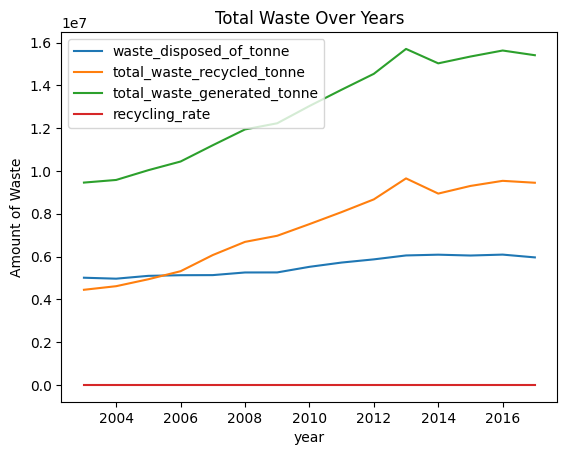

In [ ]:
if 'year'in df.columns:

 df.groupby('year').sum().plot(kind='line')
plt.title('Total Waste Over Years')
plt.ylabel('Amount of Waste')
plt.show()

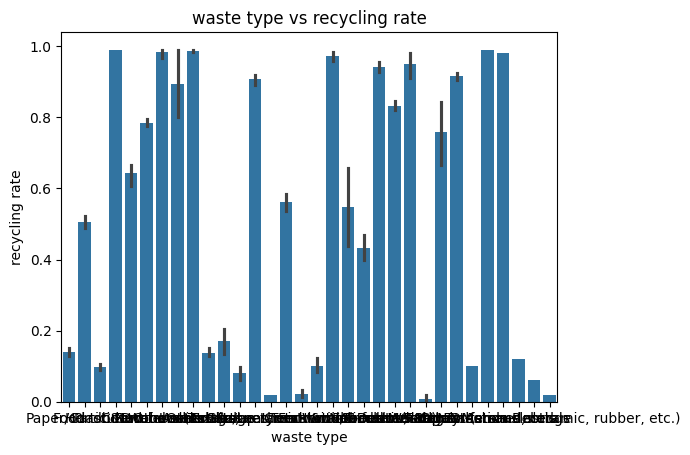

In [ ]:
waste=sns.barplot(data=df,x='waste_type',y='recycling_rate')
plt.title('waste type vs recycling rate')
plt.xlabel('waste type')
plt.ylabel('recycling rate')
plt.show()

In [ ]:
df['not_recycled'] = df['total_waste_generated_tonne'] - df['total_waste_recycled_tonne']


In [ ]:
df['not_recycled']

,not_recycled
0,679900
1,576000
2,762700
3,9700
4,111500
...,...
220,214800
221,763400
222,141200
223,319300


<Axes: xlabel='year', ylabel='not_recycled'>

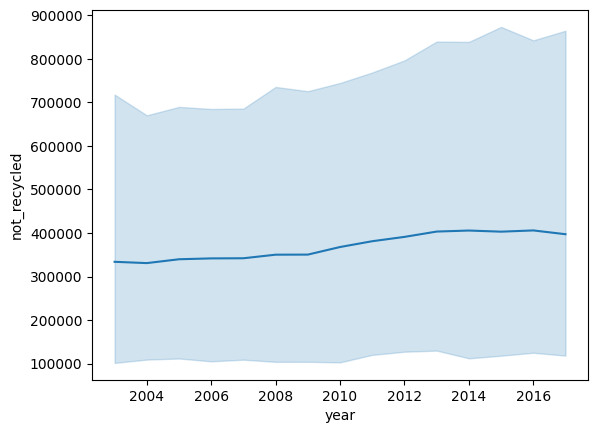

In [ ]:
nr=sns.lineplot(data=df,x='year',y='not_recycled',)
nr

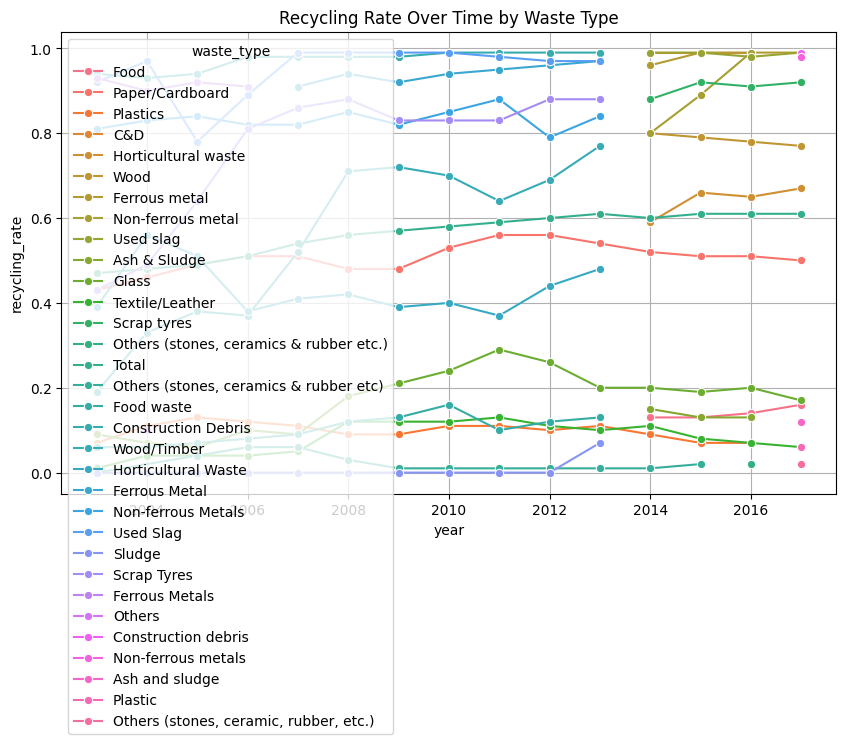

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x="year", y="recycling_rate", hue="waste_type", marker="o")
plt.title("Recycling Rate Over Time by Waste Type")
plt.grid(True)
plt.show()


<ipython-input-16-341558345f22>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=total_by_year, x="year", y="total_waste_generated_tonne", palette="viridis")


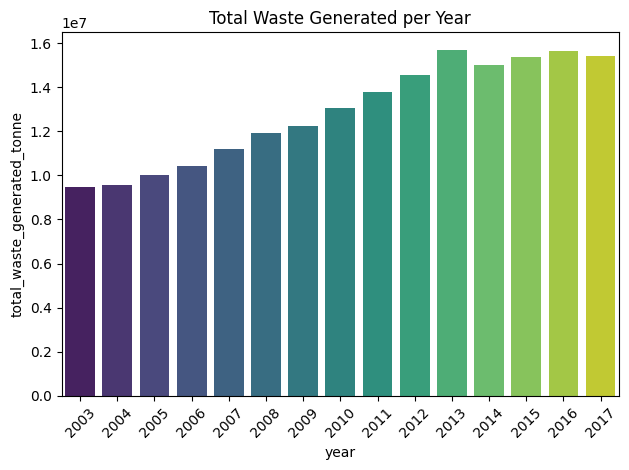

In [ ]:
total_by_year = df.groupby("year")["total_waste_generated_tonne"].sum().reset_index()
sns.barplot(data=total_by_year, x="year", y="total_waste_generated_tonne", palette="viridis")
plt.xticks(rotation=45)
plt.title("Total Waste Generated per Year")
plt.tight_layout()
plt.show()

In [ ]:
requirements = """
pandas
matplotlib
seaborn
streamlit
"""
with open("requirements.txt", "w") as f:
    f.write(requirements)


In [ ]:
app_code = """
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("2003_2017_waste.csv")

# Clean column names and drop NA
df.columns = [col.strip().lower().replace(' ', '_') for col in df.columns]
df = df.dropna()

# Create not recycled column
df['not_recycled'] = df['total_waste_generated_tonne'] - df['total_waste_recycled_tonne']

st.title("♻️ Waste Data Analysis Dashboard")

# Waste type vs recycling rate
st.subheader("Waste Type vs Recycling Rate")
fig1 = plt.figure()
sns.barplot(data=df, x='waste_type', y='recycling_rate')
plt.xticks(rotation=45)
plt.xlabel('Waste Type')
plt.ylabel('Recycling Rate')
st.pyplot(fig1)

# Not recycled trend
st.subheader("Not Recycled Waste Over the Years")
fig2 = plt.figure()
sns.lineplot(data=df, x='year', y='not_recycled', marker='o')
plt.ylabel('Amount of Not Recycled Waste')
st.pyplot(fig2)

# Recycling rate over time by waste type
st.subheader("Recycling Rate Over Time by Waste Type")
fig3 = plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x="year", y="recycling_rate", hue="waste_type", marker="o")
plt.title("Recycling Rate by Waste Type")
plt.grid(True)
st.pyplot(fig3)

# Total Waste per year
st.subheader("Total Waste Generated per Year")
total_by_year = df.groupby("year")["total_waste_generated_tonne"].sum().reset_index()
fig4 = plt.figure()
sns.barplot(data=total_by_year, x="year", y="total_waste_generated_tonne", palette="viridis")
plt.xticks(rotation=45)
plt.tight_layout()
st.pyplot(fig4)
"""

with open("app.py", "w") as f:
    f.write(app_code)


In [ ]:
  from google.colab import files
files.download("app.py")
files.download("requirements.txt")
files.download("2003_2017_waste.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>